do the drill down on the top 5 airports from the eastern hemisphere.

In [16]:
# load packages
import networkx as nx
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Data Selection

In [17]:
# extract data
route_url = 'https://raw.githubusercontent.com/eddiexunyc/web_analytics_work/refs/heads/main/Project%201/Resources/routes.csv'
airports_url = 'https://raw.githubusercontent.com/eddiexunyc/web_analytics_work/refs/heads/main/Project%201/Resources/airports.csv'

route_data = pd.read_csv(route_url)
airports_data = pd.read_csv(airports_url)

## Exploratory Data Analysis

In [18]:
airports_data.head()

,index,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [19]:
# filter on southern hemisphere
airports_eastern = airports_data[airports_data['Latitude'] < 0]
airports_eastern.head()

,index,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [20]:
# route data
route_data.head()

,index,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [21]:
# route 
# set(route_data['Source airport']) == set(route_data['Destination airport'])
airport_nodes = set(route_data['Source airport']) | set(route_data['Destination airport'])
len(airport_nodes)

3425

In [22]:
airport_nodes = pd.DataFrame(airport_nodes, columns = ['IATA'])
airport_nodes = pd.merge(airport_nodes, airports_data, on='IATA', how='inner')
airport_nodes.head()

,IATA,index,Airport ID,Name,City,Country,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,PSC,4768,6133,Tri Cities Airport,Pasco,United States,KPSC,46.264702,-119.119003,410,-8,A,America/Los_Angeles,airport,OurAirports
1,SYY,535,541,Stornoway Airport,Stornoway,United Kingdom,EGPO,58.215599,-6.331110,26,0,E,Europe/London,airport,OurAirports
2,SPB,5496,7309,Charlotte Amalie Harbor Seaplane Base,Charlotte Amalie,Virgin Islands,VI22,18.338600,-64.940697,0,-4,A,America/St_Thomas,airport,OurAirports
3,VER,1796,1854,General Heriberto Jara International Airport,Vera Cruz,Mexico,MMVR,19.145901,-96.187302,90,-6,S,America/Mexico_City,airport,OurAirports
4,SDK,3913,4141,Sandakan Airport,Sandakan,Malaysia,WBKS,5.900900,118.058998,46,8,N,Asia/Kuala_Lumpur,airport,OurAirports


In [23]:
routes_merged1 = pd.merge(route_data,airport_nodes[['IATA']],left_on='Source airport',right_on='IATA',how='inner')
routes_merged2 = pd.merge(routes_merged1,airport_nodes[['IATA']],left_on='Destination airport',right_on='IATA',how='inner')
routes = routes_merged2.loc[:, 'Source airport':'Stops']
routes.head()

,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops
0,AER,2965,KZN,2990,NaN,0
1,ASF,2966,KZN,2990,NaN,0
2,CEK,2968,KZN,2990,NaN,0
3,DME,4029,KZN,2990,NaN,0
4,DME,4029,KZN,2990,NaN,0


## Network Analysis

In [ ]:
# create network
g = nx.from_pandas_edgelist(routes, 'Source airport', 'Destination airport', True, nx.DiGraph())
nx.set_node_attributes(g, airport_nodes.set_index('IATA').to_dict('index'))

In [25]:
# calculate degree centrality for western hemisphere
western_degree = nx.degree(g)
western_degree

DiDegreeView({'AER': 35, 'KZN': 42, 'ASF': 14, 'CEK': 28, 'DME': 376, 'EGO': 18, 'LED': 222, 'SVX': 131, 'DWC': 77, 'FEG': 12, 'SKD': 11, 'UFA': 38, 'AYT': 127, 'SVO': 288, 'ALA': 90, 'DYU': 61, 'FRU': 44, 'IST': 455, 'LBD': 38, 'SHJ': 156, 'TAS': 113, 'OSS': 26, 'MRV': 32, 'NBC': 14, 'OVB': 105, 'IKT': 56, 'URC': 108, 'DXB': 368, 'DEL': 194, 'KBL': 28, 'FRA': 477, 'KJA': 61, 'KRR': 67, 'IKA': 87, 'SGC': 24, 'KUF': 40, 'ROV': 44, 'VOG': 20, 'MHD': 74, 'REN': 12, 'OMS': 30, 'GOJ': 30, 'KIV': 50, 'LCA': 108, 'MUC': 380, 'BLQ': 128, 'TSF': 76, 'ATH': 206, 'DUB': 288, 'FCO': 316, 'LIS': 204, 'MXP': 218, 'STN': 305, 'VCE': 146, 'VIE': 275, 'VRN': 45, 'RIX': 136, 'BVA': 118, 'KBP': 123, 'OTP': 134, 'CIA': 100, 'MSQ': 82, 'GYD': 78, 'KGD': 20, 'GVA': 201, 'ARN': 246, 'BCN': 326, 'LGW': 330, 'AMS': 463, 'TLV': 157, 'BUD': 154, 'CDG': 470, 'HAJ': 100, 'HEL': 176, 'NCE': 178, 'PRG': 188, 'WAW': 156, 'SXF': 137, 'TBS': 49, 'EVN': 66, 'AUH': 176, 'BUS': 10, 'KUT': 16, 'VNO': 92, 'BEY': 89, 'ASB': 

In [26]:
# calculate eigenvector centrality
western_eig = nx.eigenvector_centrality(g)
western_eig

{'AER': 0.009111239141185602,
 'KZN': 0.00889070867783722,
 'ASF': 0.004767612255405484,
 'CEK': 0.006756785562514941,
 'DME': 0.07664488574835861,
 'EGO': 0.0032910116919217156,
 'LED': 0.06613616756838839,
 'SVX': 0.028054737089285024,
 'DWC': 0.014335871259533837,
 'FEG': 0.0032660591196019212,
 'SKD': 0.0028126947376791935,
 'UFA': 0.009185068940075671,
 'AYT': 0.05219869276079317,
 'SVO': 0.09638705339933616,
 'ALA': 0.026274249402887254,
 'DYU': 0.0132056863435374,
 'FRU': 0.01106623374026453,
 'IST': 0.12959056015885467,
 'LBD': 0.0047546155895869064,
 'SHJ': 0.020304107337254473,
 'TAS': 0.03201875988418313,
 'OSS': 0.005765498408483628,
 'MRV': 0.00987706202578208,
 'NBC': 0.006386433667289832,
 'OVB': 0.02294094039127263,
 'IKT': 0.007346380966489642,
 'URC': 0.014062534487666345,
 'DXB': 0.10271112104397156,
 'DEL': 0.05097582318556156,
 'KBL': 0.00645219760409965,
 'FRA': 0.16578156893654816,
 'KJA': 0.01116700675361843,
 'KRR': 0.019634389129477844,
 'IKA': 0.0379076785462

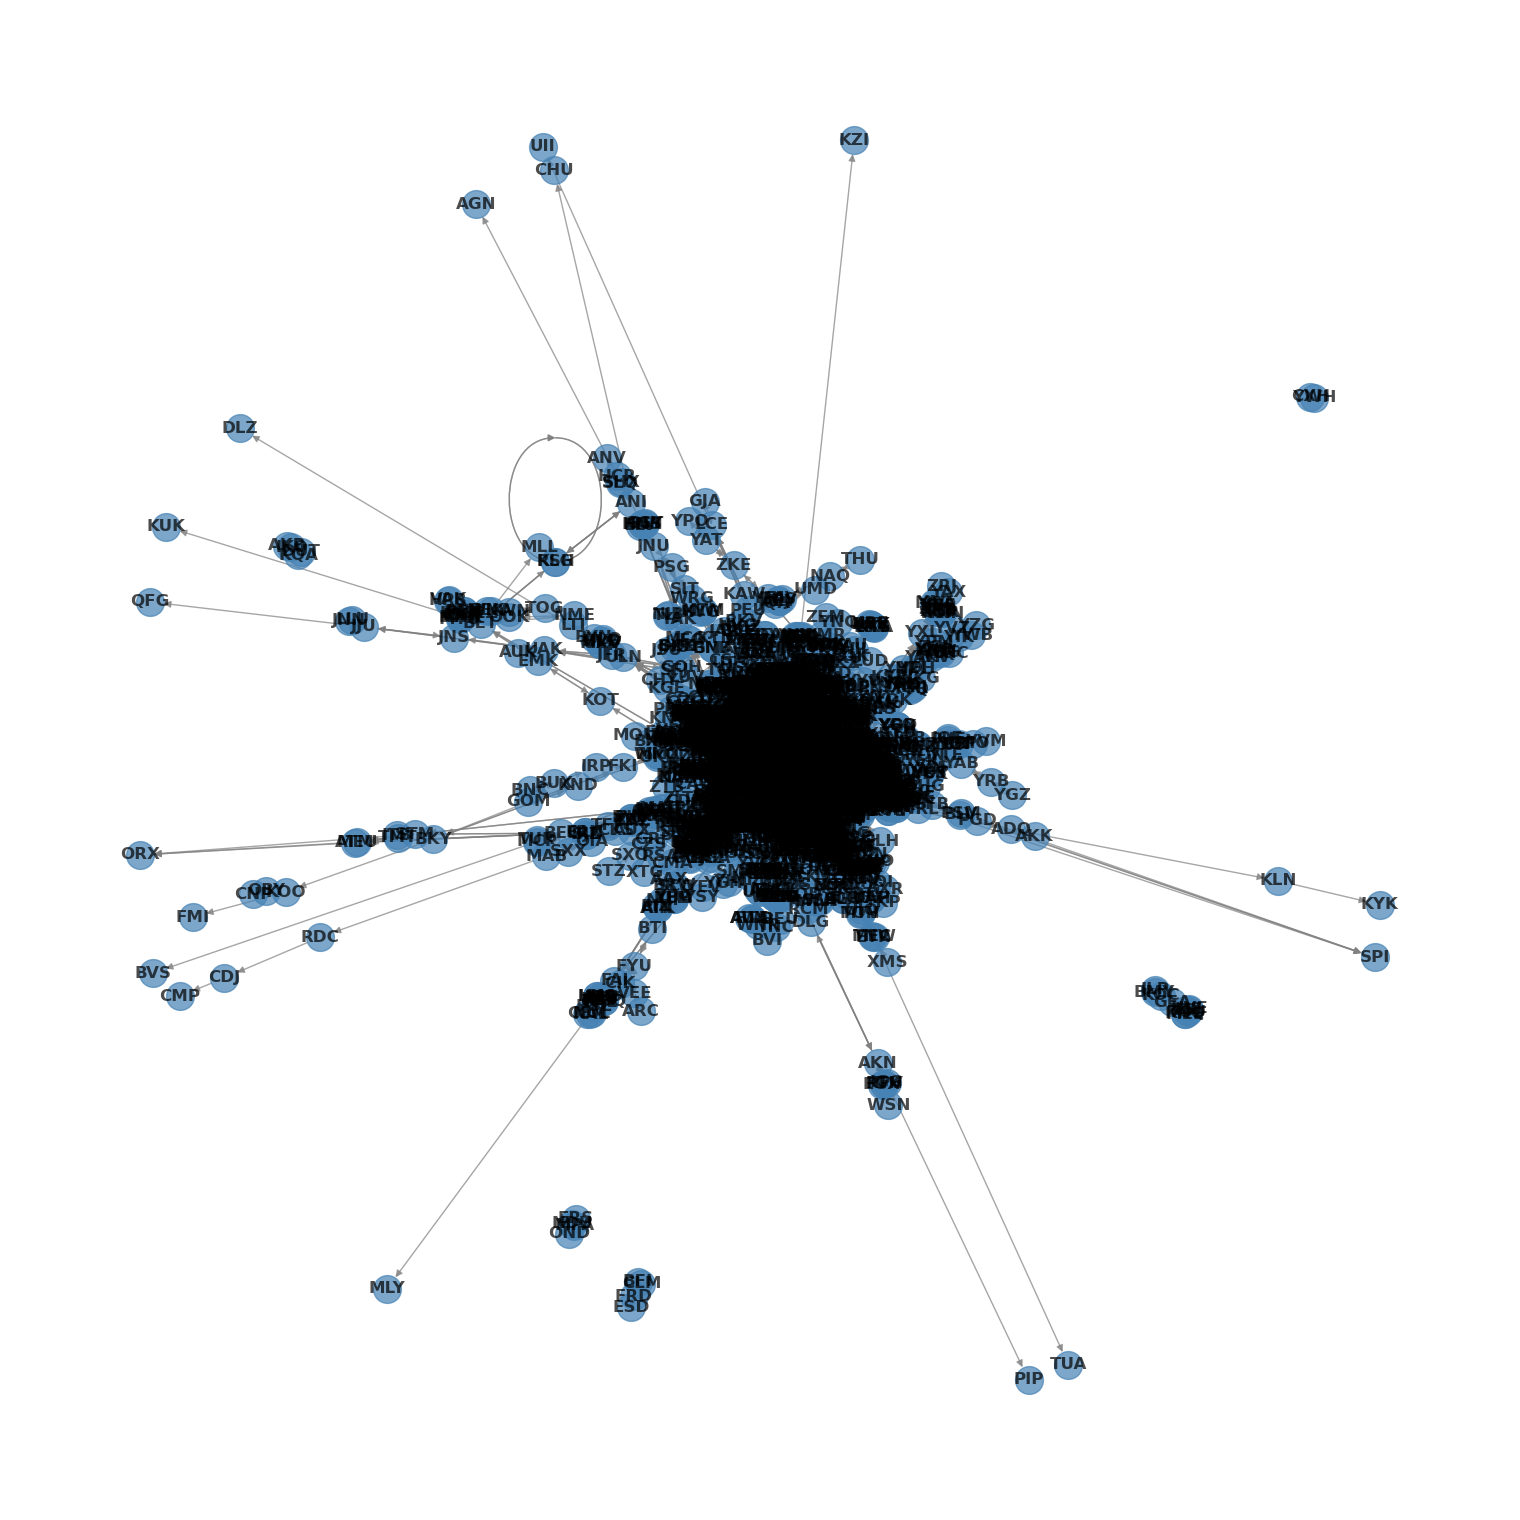

In [27]:
# set plot size
plt.rcParams["figure.figsize"] = (15,15)

# Draw the Graph
nx.draw(g, with_labels=True, node_size=400, node_color='steelblue', font_weight='bold', 
        edge_color="grey", alpha=0.7) 


In [28]:
# find the top 5 airport
